In [31]:
import os
import requests
import pandas as pd
import numpy as np

# URL and API Key of Alpha Vantage
url = 'https://www.alphavantage.co/query?'

api_key = os.getenv('ALPHA_VANTAGE_API_KEY')

params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'TSLA',
    'outputsize': 'full',
    'datatype': 'csv',
    'apikey': api_key
}

headers = {
}

In [28]:
print(api_key)

UL5CJJGFRPG14MGK


In [32]:
# url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=UL5CJJGFRPG14MGK&datatype=csv&outputsize=full"

# payload = {}
# headers = {
#   'ALPHA_VANTAGE_API_KEY': 'UL5CJJGFRPG14MGK'
# }

response = requests.request("GET", url, params=params, headers=headers)

print(response.text)

timestamp,open,high,low,close,volume
2023-08-31,255.9800,261.1800,255.0500,258.0800,108861698
2023-08-30,254.2000,260.5100,250.5900,256.9000,121988437
2023-08-29,238.5800,257.4800,237.7700,257.1800,134047603
2023-08-28,242.5800,244.3800,235.3500,238.8200,107673727
2023-08-25,231.3100,239.0000,230.3500,238.5900,106612231
2023-08-24,238.6600,238.9200,228.1801,230.0400,99777432
2023-08-23,229.3400,238.9800,229.2900,236.8600,101077635
2023-08-22,240.2500,240.8200,229.5500,233.1900,130597886
2023-08-21,221.5512,232.1343,220.5800,231.2800,135702671
2023-08-18,214.1200,217.5800,212.3600,215.4900,136276584
2023-08-17,226.0600,226.7400,218.8300,219.2200,120718417
2023-08-16,228.0200,233.9700,225.3800,225.6000,112484520
2023-08-15,238.7300,240.5000,232.6100,232.9600,88197599
2023-08-14,235.7000,240.6600,233.7500,239.7600,98595331
2023-08-11,241.7700,243.7900,238.0200,242.6500,99038642
2023-08-10,245.4000,251.8000,243.0000,245.3400,109498608
2023-08-09,250.8700,251.1000,241.9000,242.1900,10159632

In [33]:
# Transforming the content of the request to a dataframe.
request_content = response.content
data = list(map(lambda x: x.split(','),request_content.decode('utf-8').split("\r\n")))
print(data)
df = pd.DataFrame(data[1:], columns=data[0])
#df = df.set_index('timestamp')
#df.index = pd.to_datetime(df.index)
df.head()

[['timestamp', 'open', 'high', 'low', 'close', 'volume'], ['2023-08-31', '255.9800', '261.1800', '255.0500', '258.0800', '108861698'], ['2023-08-30', '254.2000', '260.5100', '250.5900', '256.9000', '121988437'], ['2023-08-29', '238.5800', '257.4800', '237.7700', '257.1800', '134047603'], ['2023-08-28', '242.5800', '244.3800', '235.3500', '238.8200', '107673727'], ['2023-08-25', '231.3100', '239.0000', '230.3500', '238.5900', '106612231'], ['2023-08-24', '238.6600', '238.9200', '228.1801', '230.0400', '99777432'], ['2023-08-23', '229.3400', '238.9800', '229.2900', '236.8600', '101077635'], ['2023-08-22', '240.2500', '240.8200', '229.5500', '233.1900', '130597886'], ['2023-08-21', '221.5512', '232.1343', '220.5800', '231.2800', '135702671'], ['2023-08-18', '214.1200', '217.5800', '212.3600', '215.4900', '136276584'], ['2023-08-17', '226.0600', '226.7400', '218.8300', '219.2200', '120718417'], ['2023-08-16', '228.0200', '233.9700', '225.3800', '225.6000', '112484520'], ['2023-08-15', '238

,timestamp,open,high,low,close,volume
0,2023-08-31,255.9800,261.1800,255.0500,258.0800,108861698
1,2023-08-30,254.2000,260.5100,250.5900,256.9000,121988437
2,2023-08-29,238.5800,257.4800,237.7700,257.1800,134047603
3,2023-08-28,242.5800,244.3800,235.3500,238.8200,107673727
4,2023-08-25,231.3100,239.0000,230.3500,238.5900,106612231


In [34]:
df.describe()

,timestamp,open,high,low,close,volume
count,3318,3317,3317,3317,3317,3317
unique,3318,3009,3020,3035,3108,3305
top,2023-08-31,28.0000,30.0000,28.0000,27.4200,987600
freq,1,7,7,6,4,2


In [35]:
num_cols = ['open', 'high', 'low', 'close', 'volume']

for col in num_cols:  
    df[col] = df[col].astype('float')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  3318 non-null   object 
 1   open       3317 non-null   float64
 2   high       3317 non-null   float64
 3   low        3317 non-null   float64
 4   close      3317 non-null   float64
 5   volume     3317 non-null   float64
dtypes: float64(5), object(1)
memory usage: 155.7+ KB


In [37]:
df.describe()

,open,high,low,close,volume
count,3317.000000,3317.000000,3317.000000,3317.000000,3.317000e+03
mean,309.738891,316.495419,302.641125,309.805638,1.943731e+07
std,295.041902,303.010227,286.736800,295.240661,3.607582e+07
min,16.140000,16.630000,14.980000,15.800000,1.185000e+05
25%,141.905000,145.650000,138.530000,142.190000,3.097200e+06
50%,234.250000,237.850000,229.380000,233.420000,6.471703e+06
75%,342.330000,348.270000,336.090000,342.770000,1.794454e+07
max,2295.120000,2318.490000,2186.520000,2238.750000,3.065906e+08


In [38]:
print(df)

       timestamp    open      high     low   close       volume
0     2023-08-31  255.98  261.1800  255.05  258.08  108861698.0
1     2023-08-30  254.20  260.5100  250.59  256.90  121988437.0
2     2023-08-29  238.58  257.4800  237.77  257.18  134047603.0
3     2023-08-28  242.58  244.3800  235.35  238.82  107673727.0
4     2023-08-25  231.31  239.0000  230.35  238.59  106612231.0
...          ...     ...       ...     ...     ...          ...
3313  2010-07-02   23.00   23.1000   18.71   19.20    5139800.0
3314  2010-07-01   25.00   25.9200   20.27   21.96    8218800.0
3315  2010-06-30   25.79   30.4192   23.30   23.83   17187100.0
3316  2010-06-29   19.00   25.0000   17.54   23.89   18766300.0
3317                 NaN       NaN     NaN     NaN          NaN

[3318 rows x 6 columns]


In [39]:
df = df.rename(columns={'timestamp': 'date'})

In [40]:
# Reindex data using a DatetimeIndex
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)

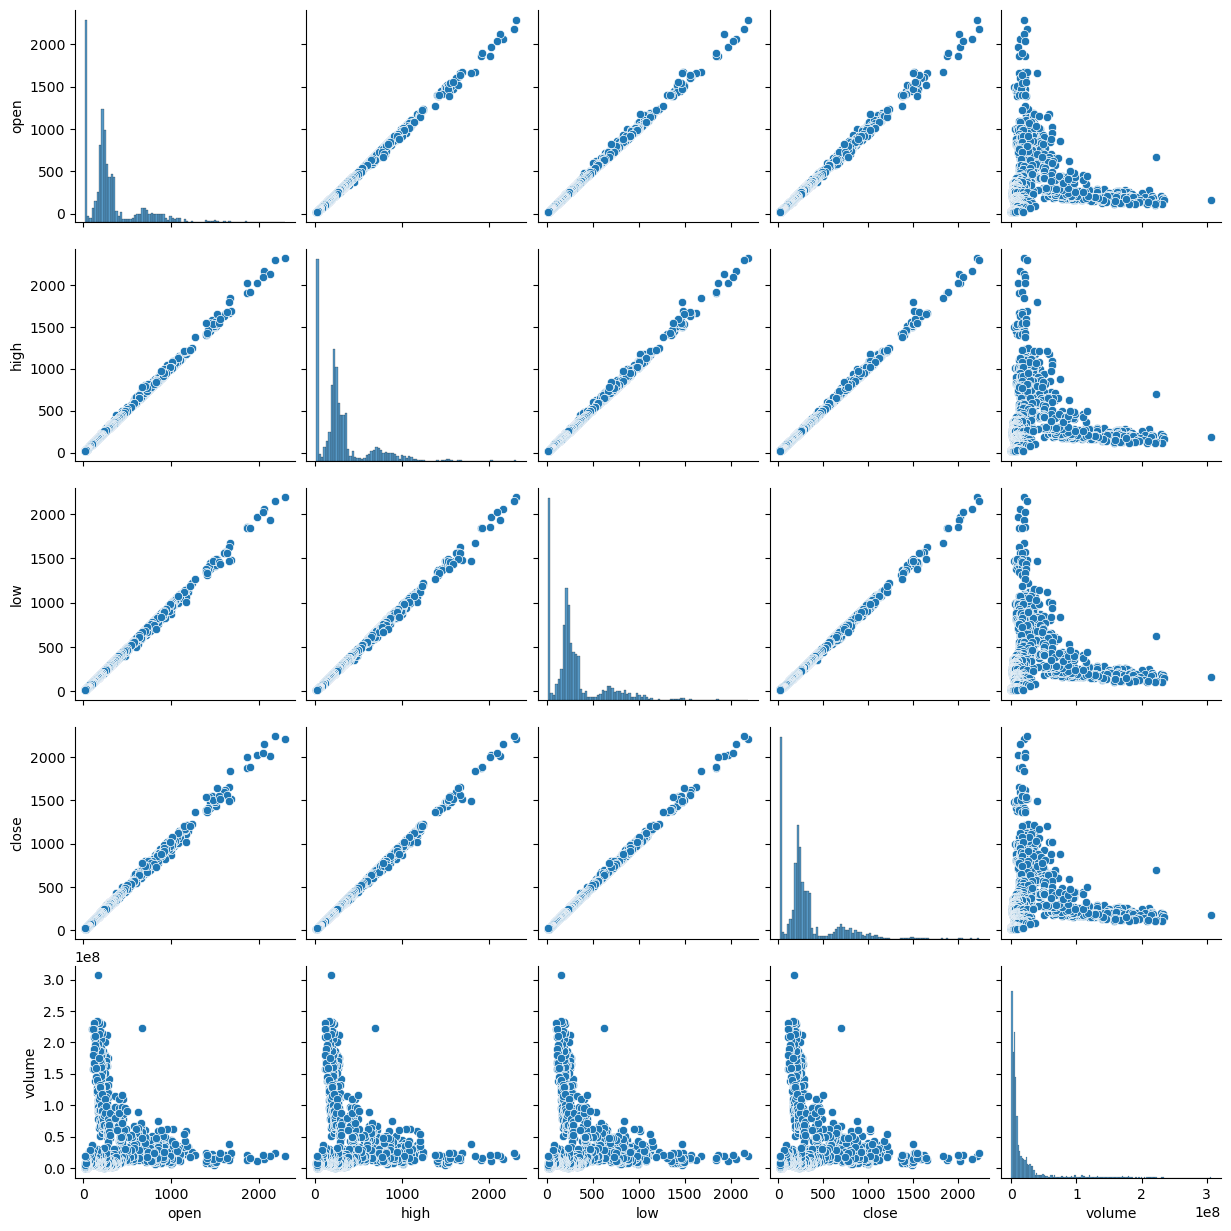

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

In [44]:
# For plotting candlestick charts.
import plotly.graph_objects as go
# bse_data_reset_index_df = df

# fig = go.Figure(data=[go.Candlestick(x=bse_data_reset_index_df['date'],
#                 open=bse_data_reset_index_df['open'],
#                 high=bse_data_reset_index_df['high'],
#                 low=bse_data_reset_index_df['low'],
#                 close=bse_data_reset_index_df['close'])])

fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])
fig.show()

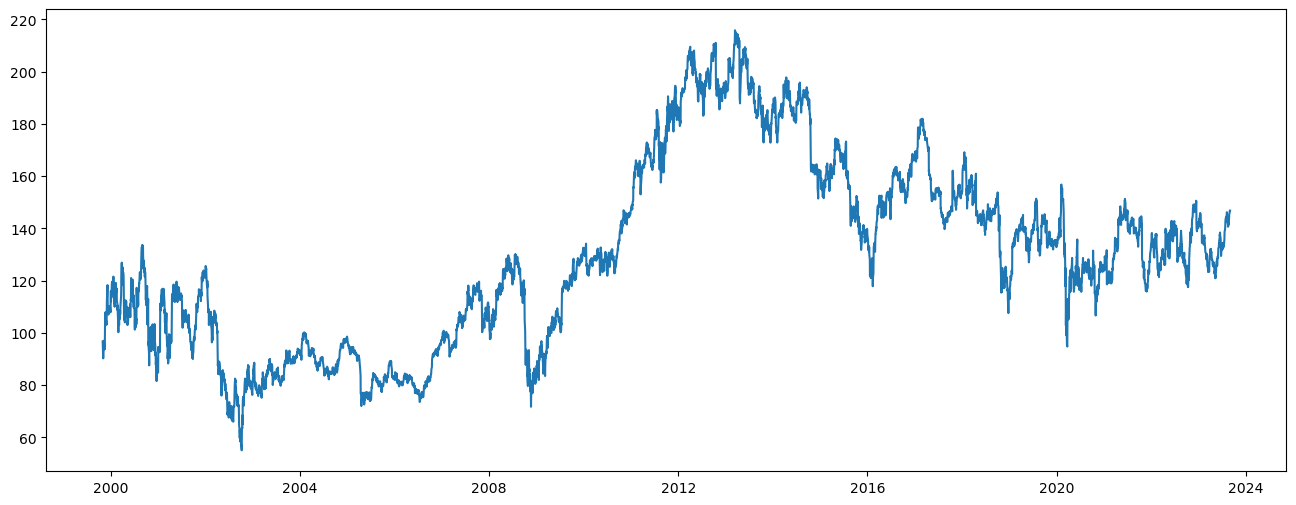

In [15]:
# Plotting the time series.
plt.figure(figsize=(16,6))
plt.plot(df['close'])
plt.show()

In [18]:
df.isnull().sum()

date      0
open      1
high      1
low       1
close     1
volume    1
dtype: int64

In [19]:
df = df.dropna()

### Decompose Time Series Data into Trend and Seasonality

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

<Figure size 640x480 with 0 Axes>

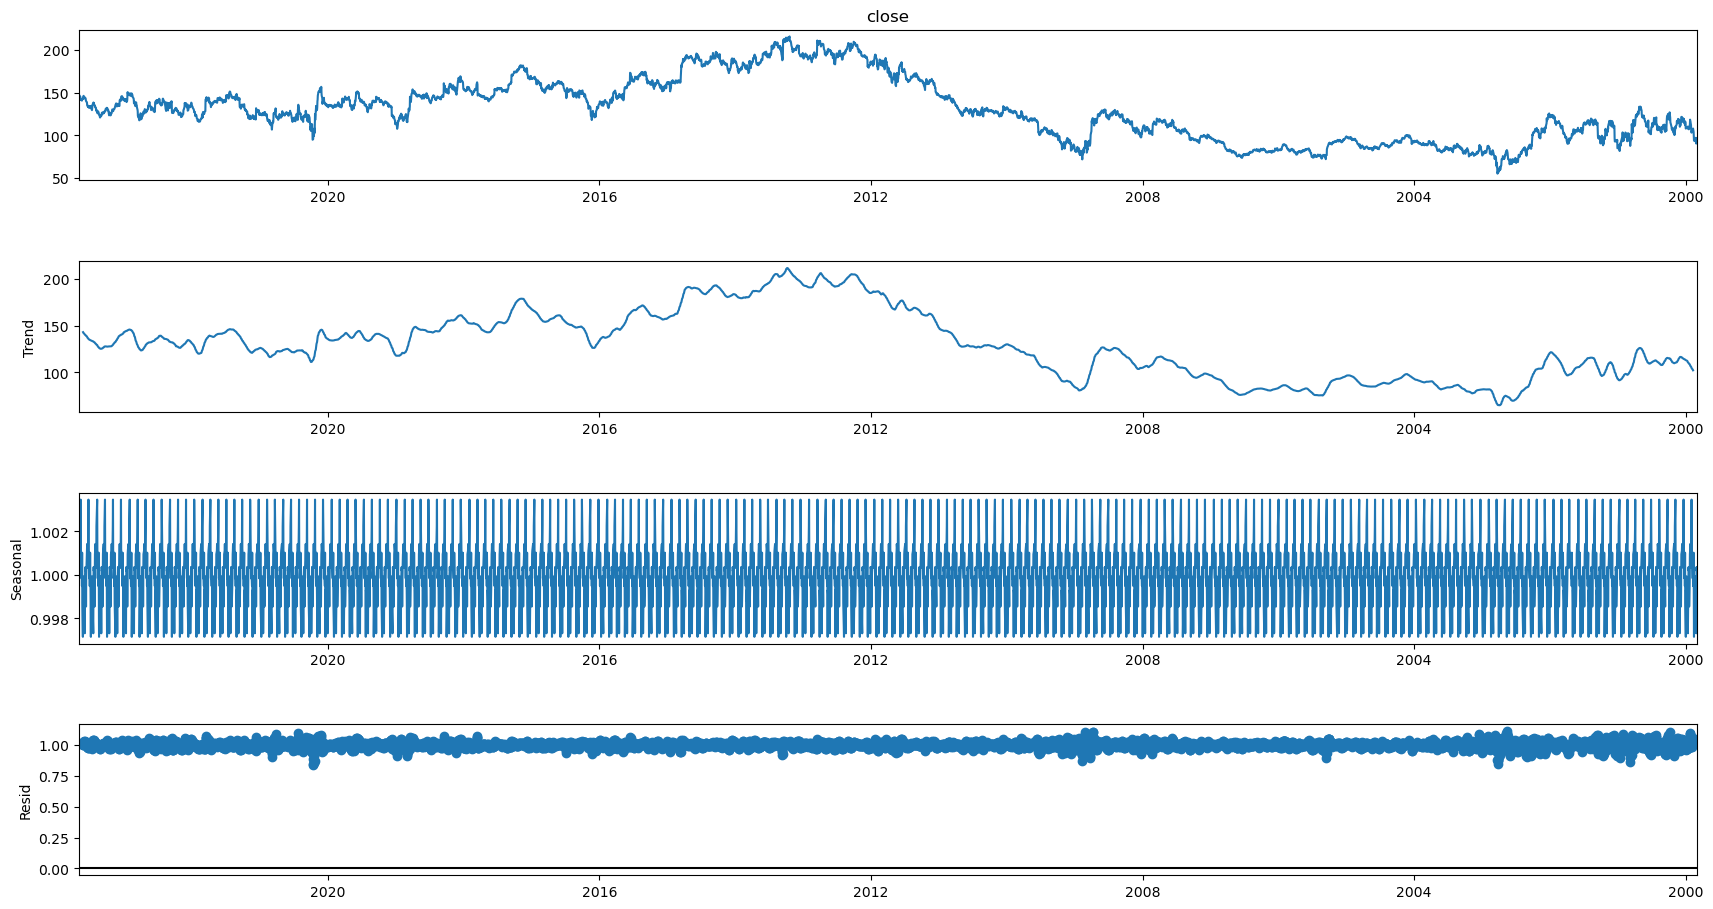

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Checking decomposition of trend, seasonality and residue of the original time seires.
decomposition = seasonal_decompose(df['close'], model='multiplicative', period=30)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(20, 10)

In [ ]:
import pandas_ta
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df.ta.ema(close='close', length=10, append=True)


date
2023-08-30          NaN
2023-08-29          NaN
2023-08-28          NaN
2023-08-25          NaN
2023-08-24          NaN
                ...    
1999-11-04    94.845170
1999-11-03    94.758776
1999-11-02    94.768089
1999-11-01    95.128437
NaT           95.128437
Name: EMA_10, Length: 5997, dtype: float64

In [ ]:
df

,close,EMA_10
date,,
2023-08-30,146.88,NaN
2023-08-29,146.45,NaN
2023-08-28,146.02,NaN
2023-08-25,145.35,NaN
2023-08-24,143.55,NaN
...,...,...
1999-11-04,91.56,94.845170
1999-11-03,94.37,94.758776
1999-11-02,94.81,94.768089


In [ ]:
# Drop the first n-rows
df = df.iloc[10:]

# View our newly-formed dataset
print(df.head(10))

             close      EMA_10
date                          
2023-08-16  140.64  143.184545
2023-08-15  141.87  142.945537
2023-08-14  141.91  142.757258
2023-08-11  143.12  142.823211
2023-08-10  143.25  142.900809
2023-08-09  142.49  142.826116
2023-08-08  145.91  143.386822
2023-08-07  146.18  143.894673
2023-08-04  144.24  143.957460
2023-08-03  144.45  144.047012


In [ ]:
df.isnull().sum()

close     1
EMA_10    0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

close     0
EMA_10    0
dtype: int64

Test Train Split

In [ ]:
# Select X and y
X = df[['close']]
y = df[['EMA_10']]

In [ ]:
print(X.shape)
print(y.shape)

(5986, 1)
(5986, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_test.describe())

             close
count  1198.000000
mean    128.567312
std      35.196693
min      63.920000
25%      98.682500
50%     125.605000
75%     150.822500
max     213.300000


In [ ]:
print(X_train.describe())

             close
count  4788.000000
mean    129.819879
std      35.566483
min      55.070000
25%      99.397500
50%     127.655000
75%     152.925000
max     215.800000


Train the Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Create Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use model to make predictions
y_pred = model.predict(X_test)

Validating the Fit

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Mean Absolute Error: 2.04467364665659
Coefficient of Determination: 0.9935869081901092


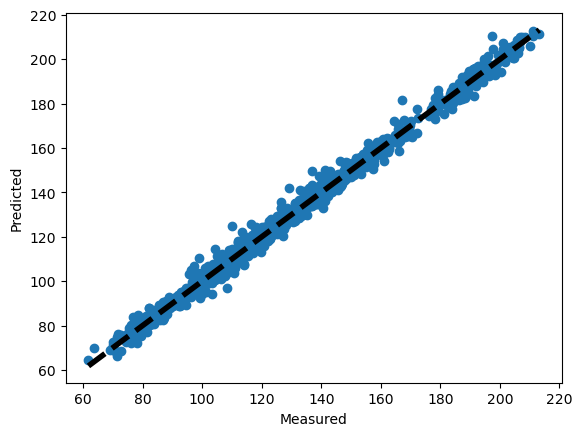

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Interpretation

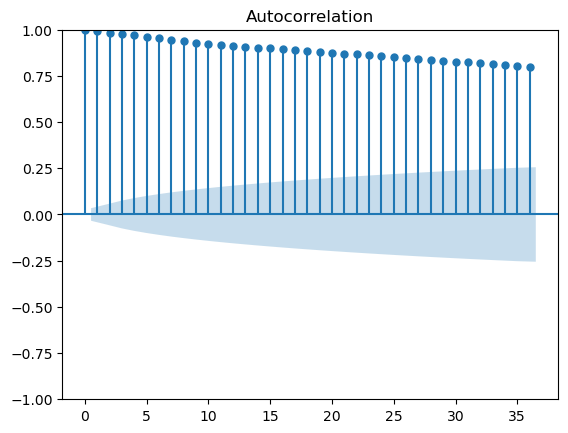

In [52]:
from statsmodels.graphics.tsaplots import plot_acf

df_arima = df[['date', 'close']].set_index(['date'])
df_arima = df_arima.dropna()

plot_acf(df_arima)

plt.show()

In [51]:
df_arima.isnull().sum()

close    1
dtype: int64

## Ways to get data from source

- Alpha Vantage API
- Yahoo Finance

In [54]:
import yfinance as yf
from datetime import datetime

symbol = "TSLA"
symbol_name = yf.Ticker(symbol)

In [83]:
# Get data of 10 recent years
df = yf.download(symbol, period='10y')

# Save the data to CSV file
df.to_csv('data/' + symbol + '.csv')

[*********************100%%**********************]  1 of 1 completed


In [84]:
# Loading data from CSV file
df = pd.read_csv('data/' + symbol + '.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-09-03,11.560000,11.580000,11.093333,11.262667,11.262667,180916500
1,2013-09-04,11.318000,11.441333,11.037333,11.374667,11.374667,172135500
2,2013-09-05,11.340000,11.433333,11.216667,11.328667,11.328667,100279500
3,2013-09-06,11.238000,11.313333,11.010000,11.131333,11.131333,129295500
4,2013-09-09,10.874667,10.966667,10.567333,10.713333,10.713333,215167500


In [57]:
# # Reset index in order to re-format date
# df = df.reset_index()

# # Removing HH:MM:ss in the Date feature
# df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

# # double check dataframe
# df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-09-03,11.560000,11.580000,11.093333,11.262667,180916500,0.0,0.0
1,2013-09-04,11.318000,11.441333,11.037333,11.374667,172135500,0.0,0.0
2,2013-09-05,11.340000,11.433333,11.216667,11.328667,100279500,0.0,0.0
3,2013-09-06,11.238000,11.313333,11.010000,11.131333,129295500,0.0,0.0
4,2013-09-09,10.874667,10.966667,10.567333,10.713333,215167500,0.0,0.0


In [97]:
# Change column names to lower case to process easier
df.columns = df.columns.str.lower()

## EDA

#### Handle missing values


In [98]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj close    0
volume       0
dtype: int64

Note:
- No missing values

Handle duplicated values

In [99]:
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

Note:
- No duplicated values

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2518 non-null   object 
 1   open       2518 non-null   float64
 2   high       2518 non-null   float64
 3   low        2518 non-null   float64
 4   close      2518 non-null   float64
 5   adj close  2518 non-null   float64
 6   volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


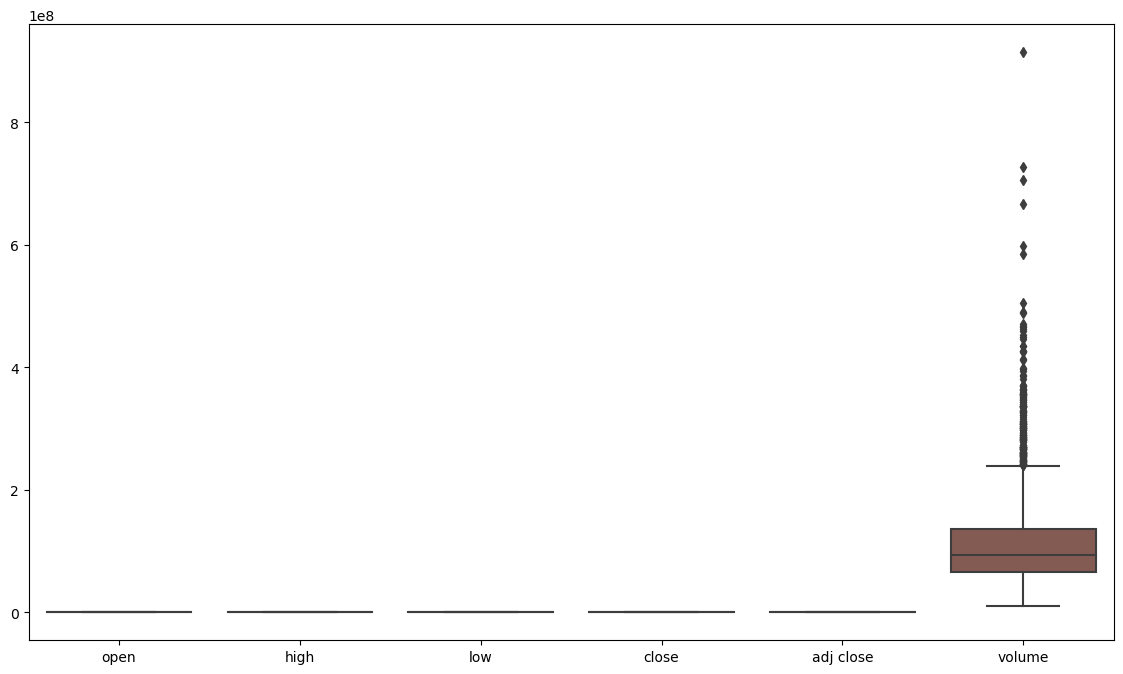

In [101]:
# Handling outliers
plt.figure(figsize=(14, 8))
sns.boxplot(df)
plt.show()

In [105]:
# Reindex data using a DatetimeIndex
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)
df.drop(columns='date')

,open,high,low,close,adj close,volume
date,,,,,,
2013-09-03,11.560000,11.580000,11.093333,11.262667,11.262667,180916500
2013-09-04,11.318000,11.441333,11.037333,11.374667,11.374667,172135500
2013-09-05,11.340000,11.433333,11.216667,11.328667,11.328667,100279500
2013-09-06,11.238000,11.313333,11.010000,11.131333,11.131333,129295500
2013-09-09,10.874667,10.966667,10.567333,10.713333,10.713333,215167500
...,...,...,...,...,...,...
2023-08-28,242.580002,244.380005,235.350006,238.820007,238.820007,107673700
2023-08-29,238.580002,257.480011,237.770004,257.179993,257.179993,134047600
2023-08-30,254.199997,260.510010,250.589996,256.899994,256.899994,121988400


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-09-03 to 2023-09-01
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2518 non-null   object 
 1   open       2518 non-null   float64
 2   high       2518 non-null   float64
 3   low        2518 non-null   float64
 4   close      2518 non-null   float64
 5   adj close  2518 non-null   float64
 6   volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 157.4+ KB


In [109]:
num_feats = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [113]:
# Function to detect outliers
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR) | (dataframe[column] > Q3 + 1.5*IQR)]
    return outliers

# Detect and print number of outliers for each feature
#for column in df.columns:
for column in num_feats:
    outliers = detect_outliers(df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in open: 0
Number of outliers in high: 0
Number of outliers in low: 0
Number of outliers in close: 0
Number of outliers in adj close: 0
Number of outliers in volume: 172


In [115]:
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    dataframe[column] = dataframe[column].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)

# Handle outliers for each feature
#for column in df.columns:
for column in num_feats:
    handle_outliers(df, column)

In [116]:
for column in num_feats:
    outliers = detect_outliers(df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in open: 0
Number of outliers in high: 0
Number of outliers in low: 0
Number of outliers in close: 0
Number of outliers in adj close: 0
Number of outliers in volume: 0
